In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np
import datetime
import pytz
import os
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
formatter = FuncFormatter(millions)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context('paper')
sns.set_palette("muted")

In [10]:
tz = pytz.timezone('America/New_York')
os.chdir('/Users/nehrend/work/algo_trading_book/')
def millions(x, pos):
    return '%1.1fM' % (x*1e-6)

formatter = FuncFormatter(millions)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context('paper')
sns.set_palette("muted")

In [162]:
def tsplot(y, lags=None, figsize=(10, 8),title='Time Series Plots'):
    fig = plt.figure(figsize=figsize)
    layout = (3, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    scatter_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
    scatter_ax.scatter(y,y.shift(1))
    scatter_ax.set_title('Lag Scatter')
    scatter_ax.set_xlabel('$Y_t$')
    scatter_ax.set_ylabel('$Y_{t+1}$')
    plt.tight_layout()
    sns.despine()
    return 

## Stationary Stochastic Processes

A time series ${Y_t}$ is said to be stationary if for every integer m and any finite set if $m$ time points $t_1; t_2;...;t_m$
the set of variables $Yt_1 ; Yt_2 ;...; Y_{tm}$ must depend only on the distance between the times $t_1; t_2;...;t_m$,rather than on their actual values

#### White Noise

A white noise process is a stochastic proces of the type:
$Y_t = \mu + \epsilon_t$
where $\epsilon_t$ are IID $N(0,{\sigma}^2)$

$Cov(Y_t,Y_{t+s}) = Var(Y_t)$ for $s=0$ and 0 for $s\neq0$

In [163]:
e=pd.Series(np.random.normal(0,1,1000))
y = 0.5 + e

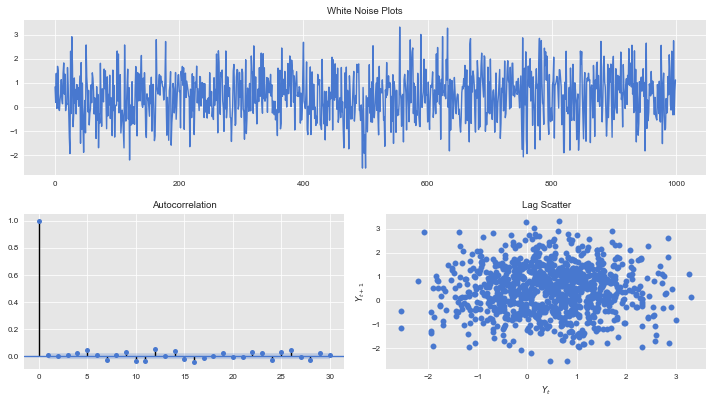

In [164]:
tsplot(y,lags=30,title='White Noise Plots')

#### Moving Average Process

A Moving average process is a stochastic proces of the type:
$Y_t = \mu + \epsilon_t + \epsilon_{t-1}$
where $\epsilon_t$ are IID $N(0,{\sigma}^2)$

$Cov(Y_t,Y_{t+s}) = Var(Y_t)$ for $s=0$ and 0 for $s\neq0$

In [166]:
e=pd.Series(np.random.normal(0,1,1000))
y = (1.0 + e + e.shift(-1))[:-1]


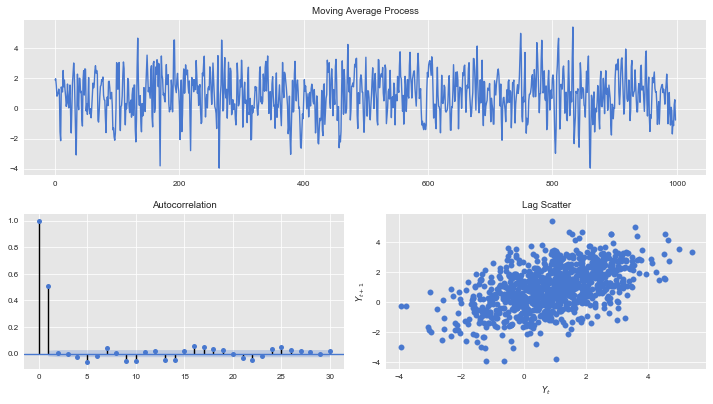

In [167]:
tsplot(y,lags=30,title='Moving Average Process')

## Non Stationary Stochastic Processes

#### Random Walk with a Drift

A Random Walk process with drift \delta and volatility \sigma is a stochastic proces of the type:</br>
$Y_t = Y_{t-1} + \delta + \epsilon_t $<br>
with $\epsilon_t$ are IID $N(0,{\sigma}^2)$

$E(Y_t) = \delta t, Var(Y_t) = \sigma^2t, Cov(Y_t,Y_{t+s}) = \frac{t}{\sqrt{t(t+s)}}$

In [168]:
drift = 0.01
vol = 1
e=pd.Series(drift + vol*np.random.normal(0,1,1000))
y = e.cumsum()

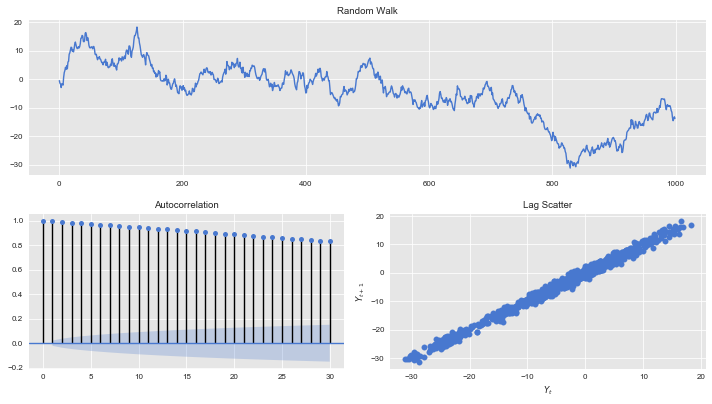

In [169]:
tsplot(y,lags=30,title='Random Walk')

The difference of a Random Walk is a stationary white noise process

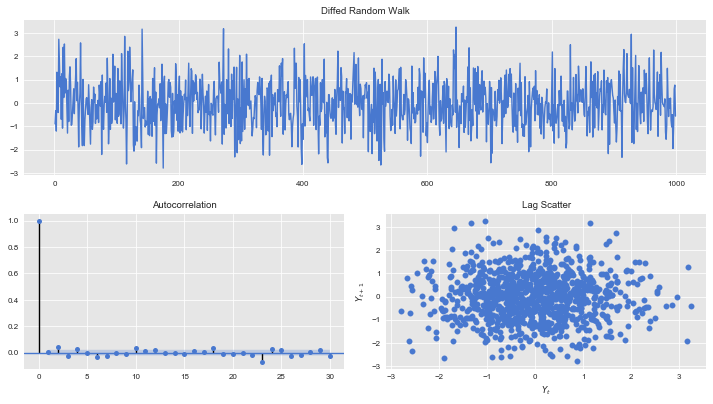

In [170]:
tsplot(y.diff()[1:],lags=30,title='Diffed Random Walk')

Let's look at a real life example. Let's load some data for AAPL

In [171]:
data = pd.read_csv('datasets/AAPL.csv',parse_dates=True,index_col=0)
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-12-22,174.68,175.424,174.500,175.01,16052615.0,0.0,1.0,174.68,175.424,174.500,175.01,16052615.0
2017-12-26,170.80,171.470,169.679,170.57,32968167.0,0.0,1.0,170.80,171.470,169.679,170.57,32968167.0
2017-12-27,170.10,170.780,169.710,170.60,21672062.0,0.0,1.0,170.10,170.780,169.710,170.60,21672062.0
2017-12-28,171.00,171.850,170.480,171.08,15997739.0,0.0,1.0,171.00,171.850,170.480,171.08,15997739.0
2017-12-29,170.52,170.590,169.220,169.23,25643711.0,0.0,1.0,170.52,170.590,169.220,169.23,25643711.0


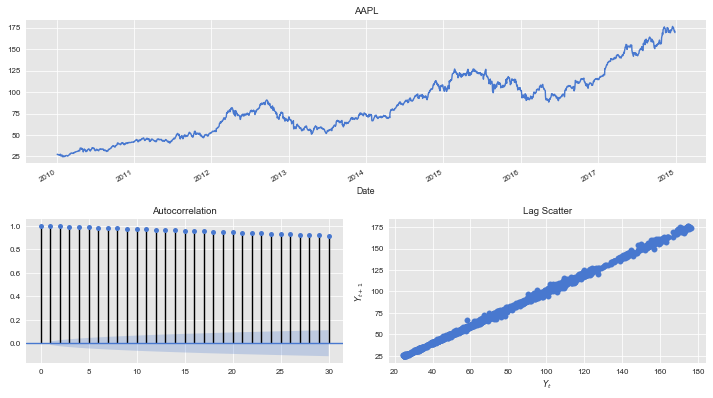

In [172]:
y = data['Adj. Close']
tsplot(y,lags=30,title='AAPL')

As you can see from the plots the behavior of APPL is not dissimilar to a random walk and looking at returns they look almost stationary

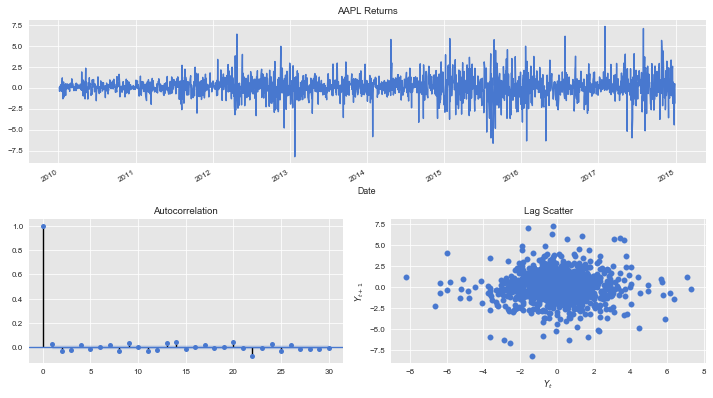

In [173]:
tsplot(y.diff()[1:],lags=30,title='AAPL Returns')

## MA Processes

A stochastic process $\{Y_t\}$ is said to be a <i>moving average process</i> of order $q$, which is denoted as MA($q$), if it satisfies the following:<br>
$Y_t = \mu + \epsilon_t - \sum_{j=1}^{q} \theta_j \epsilon_{t-j}$<br>
with $\epsilon_t$ IID $N(0,{\sigma}^2)$

We introduce the statsmodel.tsa toolkit for ARMA processes that will help generate sample data and fit ARMA models
<href>http://www.statsmodels.org/dev/index.html</href>

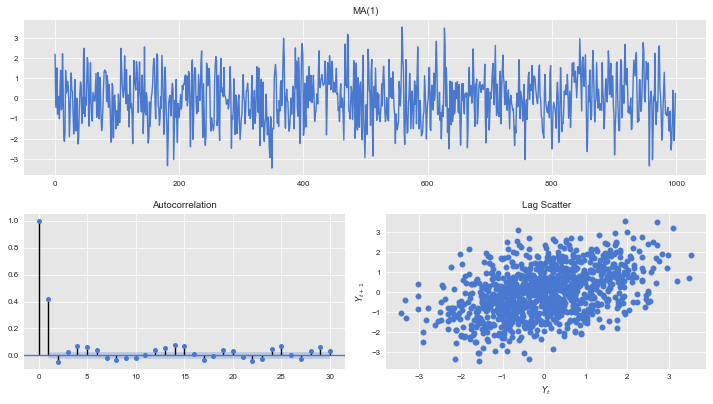

In [180]:
ar = [1,0] # The first parameter is the 0 lag. Should always be 1. This is not an ar model so next lag is 0
ma = [1,0.65] #This is a MA(1)process as it's only looking at one lag
ma_1 = pd.Series(smt.arma_generate_sample(ar=ar,ma=ma,nsample=1000))
tsplot(ma_1,lags=30,title='MA(1)')

This is the same as the moving average process we looked at before. Let's look at an higher degree MA process

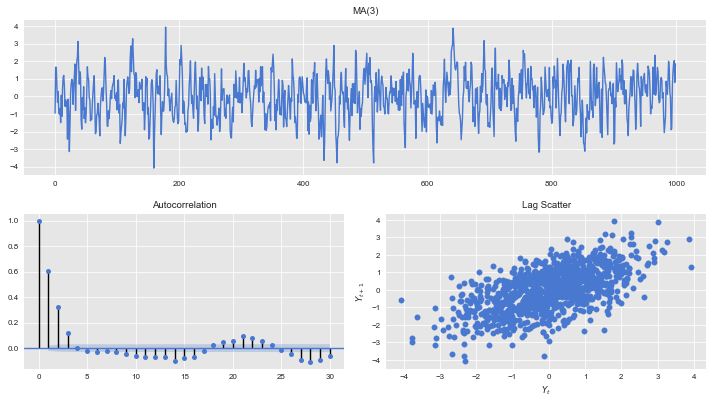

In [181]:
ar = [1,0] 
ma = [1,0.65,0.35,0.15] #MA(3)
ma_1 = pd.Series(smt.arma_generate_sample(ar=ar,ma=ma,nsample=1000))
tsplot(ma_1,lags=30,title='MA(3)')

## AR Processes

A stochastic process $\{Y_t\}$ is said to be a <i>autoregressive process</i> of order $p$, which is denoted as AR($p$), if it satisfies the following:<br>
$Y_t = \phi_1Y_{t-1} + \phi_2Y_{t-2} +\cdots + \phi_pY_{t-p} + \delta + \varepsilon_t$<br>
with $\delta$ a constant and $\epsilon_t$ IID $N(0,{\sigma}^2)$

Let's look at a couple of examples. An AR(1) process

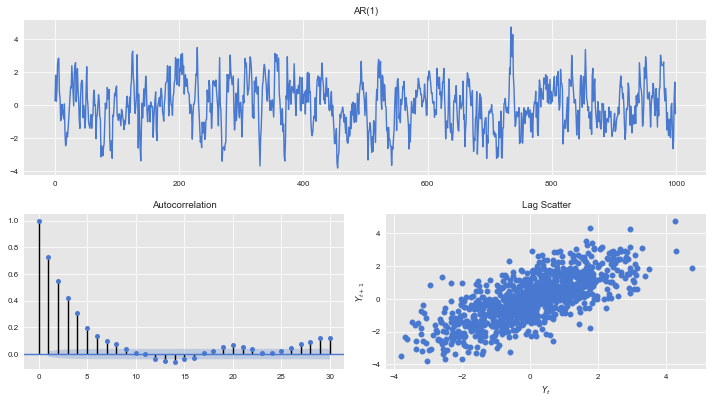

In [190]:
ar = [1,-0.75] #Note that  in statsmodel convention the ar parameters are entered in opposite sign so this is an AR(1) with parameter 0.75
ma = [1,0] #No MA components
delta = 0.1
ar_1 = pd.Series(delta + smt.arma_generate_sample(ar=ar,ma=ma,nsample=1000))
tsplot(ar_1,lags=30,title='AR(1)')

And an AR(4) process

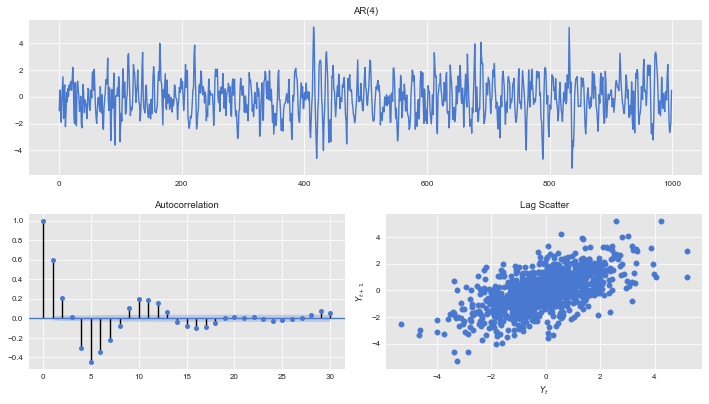

In [201]:
ar = [1,-0.75,0.36,-0.3,0.4] #AR(4)
ma = [1,0] #No MA components
ar_1 = pd.Series(smt.arma_generate_sample(ar=ar,ma=ma,nsample=1000))
tsplot(ar_1,lags=30,title='AR(4)')

## ARMA Processes